In [1]:
path='/content/drive/MyDrive/archive (1).zip'

In [2]:
import pandas as pd
from zipfile import ZipFile

In [3]:
Zip=ZipFile('/content/drive/MyDrive/archive (1).zip', 'r')
Zip.extractall()
Zip.close()

In [4]:
test='/content/Corona_NLP_test.csv'
train='/content/Corona_NLP_train.csv'

In [5]:
train_df=pd.read_csv(train, engine='python')
test_df=pd.read_csv(test)

In [6]:
train_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


**DATA CLEANING**

In [ ]:
train_df.shape

(41157, 6)

In [ ]:
# Check for missing values
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [7]:
#The location column alone has Missing value:fill the Missing value as unknown
train_df['Location'].fillna('Unknown', inplace=True)

In [8]:
#Change Tweetat dtype from object to datetime64
train_df['TweetAt']=train_df['TweetAt'].astype('datetime64')

In [9]:
#drop_duplicate rows if exist
train_df.drop_duplicates(keep='first', inplace=True)
train_df.shape
#same row value. No duplicate rows exists

(41157, 6)

In [ ]:
# Checking for badly formmatted data(object datatype) such as typo errors etc
for i in ['Sentiment','Location']:
  x=train_df[i].unique()
  print(x)
#The Sentiment columns is well formatted but the Location column has bad formats

['Neutral' 'Positive' 'Extremely Negative' 'Negative' 'Extremely Positive']
['London' 'UK' 'Vagabonds' ... 'Juba south sudan' 'OHIO'
 'i love you so much || he/him']


In [ ]:
train_df.info()

# **Stastical Analysis**

In [ ]:
train_df.describe(include='all')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
count,41157.000000,41157.000000,41157,41157,41157,41157
unique,NaN,NaN,12220,30,41157,5
top,NaN,NaN,Unknown,2020-03-20 00:00:00,Time for an upgrade? You know where to find us.,Positive
freq,NaN,NaN,8593,3448,1,11422
first,NaN,NaN,NaN,2020-01-04 00:00:00,NaN,NaN
last,NaN,NaN,NaN,2020-12-04 00:00:00,NaN,NaN
mean,24377.000000,69329.000000,NaN,NaN,NaN,NaN
std,11881.146851,11881.146851,NaN,NaN,NaN,NaN
min,3799.000000,48751.000000,NaN,NaN,NaN,NaN
25%,14088.000000,59040.000000,NaN,NaN,NaN,NaN


In [ ]:
# Correlation
train_df.corr()

,UserName,ScreenName
UserName,1.0,1.0
ScreenName,1.0,1.0


In [ ]:
# There is a correlation of 1 between UserName and ScreenName and since they both represent one and same user, drop one of the columns
# dropping column ScreenName
train_df.drop('ScreenName', axis=1, inplace=True)

# **INSIGHT GENERATION AND VISUALIZATION(EDA)**

what is the distribution of the sentiments?

In [ ]:
sent_dist=train_df.value_counts('Sentiment').to_frame().reset_index()
#calc percentage distribution
sent_dist=sent_dist.rename(columns={0:'count'})
sent_dist['Percent']=(sent_dist['count']/sent_dist['count'].sum())* 100
sent_dist

,Sentiment,count,Percent
0,Positive,11422,27.752266
1,Negative,9917,24.095537
2,Neutral,7713,18.740433
3,Extremely Positive,6624,16.094468
4,Extremely Negative,5481,13.317297


In [ ]:
import matplotlib.pyplot as plt


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

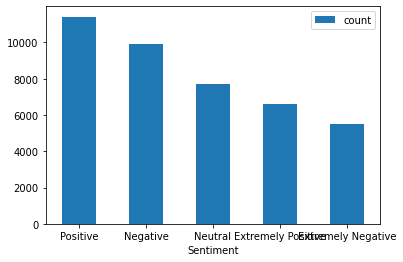

In [ ]:
# Visualization
sent_dist.plot(kind='bar', x='Sentiment', y='count')
plt.xticks(rotation = 0)
from google.colab import files
plt.savefig("abc.png")
files.download("abc.png") 

Top 10 Locations with highest tweets?

In [ ]:
Loc_dist=train_df.value_counts('Location').to_frame().reset_index()
Loc_dist=Loc_dist.rename(columns={0:'count'})
Loc_dist.iloc[:10,:]


,Location,count
0,Unknown,8593
1,London,540
2,United States,528
3,"London, England",520
4,"New York, NY",395
5,"Washington, DC",373
6,United Kingdom,337
7,"Los Angeles, CA",281
8,India,268
9,UK,232


Analysis by Time

Month with Highest tweets

In [ ]:
#extract Months into new column
train_df['months']=train_df['TweetAt'].dt.month

In [ ]:
month_dist=train_df.value_counts('months').to_frame().reset_index()
month_dist=month_dist.rename(columns={0:'count'})
month_dist

,months,count
0,3,26309
1,4,2479
2,8,1881
3,7,1843
4,6,1742
5,9,1471
6,5,1131
7,10,1005
8,2,954
9,11,909


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

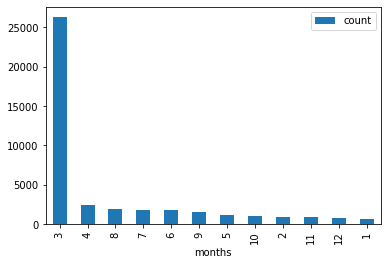

In [ ]:
# visualization
month_dist.plot(kind='bar', x='months', y='count')
plt.savefig("abc.png")
files.download("abc.png")

Day of the week with highest tweet

In [10]:
#extract dayofweek into new column
train_df['dayofweek']=train_df['TweetAt'].dt.dayofweek

In [11]:
dayofweek_dist=train_df.value_counts('dayofweek').to_frame().reset_index()
dayofweek_dist=dayofweek_dist.rename(columns={0:'count'})
dayofweek_dist

,dayofweek,count
0,2,7440
1,1,6892
2,3,6234
3,4,6067
4,5,5916
5,0,5364
6,6,3244


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

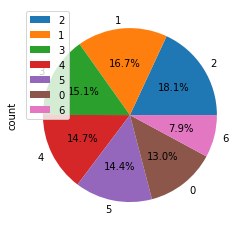

In [15]:
# Visualization
import matplotlib.pyplot as plt
from google.colab import files
dayofweek_dist.set_index('dayofweek', inplace=True)
dayofweek_dist.plot(kind='pie', y='count', autopct='%1.1f%%')
plt.savefig("abc.png")
files.download("abc.png")

Particular Date with highest tweets

In [ ]:
train_df['TweetAt'].nunique()
#This shows there are 30 unique days in the datecolumn

30

In [16]:
date_dist=train_df.value_counts('TweetAt').to_frame().reset_index()
date_dist=date_dist.rename(columns={0:'count'})
date_dist

,TweetAt,count
0,2020-03-20,3448
1,2020-03-19,3215
2,2020-03-25,2979
3,2020-03-18,2742
4,2020-03-21,2653
5,2020-03-22,2114
6,2020-03-23,2062
7,2020-03-17,1977
8,2020-08-04,1881
9,2020-07-04,1843


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

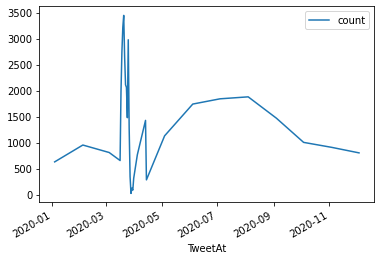

In [ ]:
# VIZ
date_dist.plot(kind='line',x='TweetAt',y='count')
plt.savefig("abc.png")
files.download("abc.png")

users with highest tweets(most active people on tweeter)

In [ ]:
train_df['UserName'].nunique()
#This shows that there are 41157 unique users in the data_sets, 
#This corresponds with number of rows showing that each user only make 1 tweet each

41157

# **BUILDING PREDICTIVE MODEL**

Training With LSTM

In [ ]:
# extract all the words to a list/array
Tweets=train_df['OriginalTweet'].values
test_tweets=test_df['OriginalTweet'].values

In [ ]:
#Label encode respective sentiments and extract to a list/array
uni=train_df['Sentiment'].unique()
num=train_df['Sentiment'].nunique()
num=range(num)
dico=dict()
for a,b in zip(uni, num):
  train_df.replace(a,b, inplace=True)
  dico[a]=b

In [ ]:
for a,b in dico.items():
    test_df['Sentiment'].replace(a,b, inplace=True)

In [ ]:
Labels=train_df['Sentiment'].values
test_Labels=test_df['Sentiment'].values

In [ ]:
#import needed library for NLP
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
num_words=5000

In [ ]:
tokenizer=Tokenizer(num_words=num_words,oov_token='oov')

In [ ]:
tokenizer.fit_on_texts(Tweets)

In [ ]:
words=tokenizer.word_index


In [ ]:
tok_tweets=tokenizer.texts_to_sequences(Tweets)
test_tok_tweets=tokenizer.texts_to_sequences(test_tweets)

In [ ]:
max_len=0
for i in tok_tweets:
    x=len(i)
    if x > max_len:
      max_len=x
    else:
      continue
max_len



69

In [ ]:
padded_seq=pad_sequences(tok_tweets,maxlen=max_len,padding='pre', truncating='post')
test_padded_seq=pad_sequences(test_tok_tweets,maxlen=max_len,padding='pre', truncating='post')

In [ ]:
model=tf.keras.Sequential([
                           tf.keras.layers.Embedding(input_dim=num_words,output_dim=64,input_length=max_len),
                           tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
                           tf.keras.layers.Dense(64, activation='relu'),
                           tf.keras.layers.Dense(64, activation='relu'),
                           tf.keras.layers.Dense(5, activation='softmax') ])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history=model.fit(padded_seq, Labels, epochs=10)

Epoch 1/10
1287/1287 [==============================] - 16s 11ms/step - loss: 1.2997 - accuracy: 0.4330
Epoch 2/10
1287/1287 [==============================] - 14s 11ms/step - loss: 0.7099 - accuracy: 0.7514
Epoch 3/10
1287/1287 [==============================] - 14s 11ms/step - loss: 0.6075 - accuracy: 0.7953
Epoch 4/10
1287/1287 [==============================] - 14s 11ms/step - loss: 0.5269 - accuracy: 0.8213
Epoch 5/10
1287/1287 [==============================] - 14s 11ms/step - loss: 0.4684 - accuracy: 0.8403
Epoch 6/10
1287/1287 [==============================] - 14s 11ms/step - loss: 0.4091 - accuracy: 0.8609
Epoch 7/10
1287/1287 [==============================] - 14s 11ms/step - loss: 0.3693 - accuracy: 0.8741
Epoch 8/10
1287/1287 [==============================] - 14s 11ms/step - loss: 0.3152 - accuracy: 0.8924
Epoch 9/10
1287/1287 [==============================] - 14s 11ms/step - loss: 0.2694 - accuracy: 0.9096
Epoch 10/10
1287/1287 [==============================] - 14s 11m

In [ ]:
model.evaluate(test_padded_seq,test_Labels)

119/119 [==============================] - 1s 5ms/step - loss: 1.1041 - accuracy: 0.7241


[1.1041359901428223, 0.7240653038024902]

Training with Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=500)

In [ ]:
lr.fit(padded_seq, Labels)

In [ ]:
lr.score(test_padded_seq,test_Labels)

0.28199052132701424